In [1]:
import mne 
import sys
import os
import pandas as pd
import numpy as np
import matplotlib
from modules import *
%load_ext autoreload
%autoreload 2
%matplotlib qt

In [133]:
# Select participant and run
run_nb=2

# List Paths
path_root="/Volumes/T5_EVO/1-experiments/REPLAYSEQ/2-Data"
path_derivative=os.path.join(path_root,"derivatives")
path_derivative_sequences=os.path.join(path_derivative,"sequence")

# Path RAW
path_raw_run=os.path.join(path_root,f"raw/Data_neurospin/sub-{sub_nb:02}/run{run_nb:02}_raw.fif")

# Path participant & run : sequence
path_participant_sequences=os.path.join(path_derivative_sequences,f"sub-{sub_nb:02}/meg")
path_run_sequences=os.path.join(path_participant_sequences,f"sub-{sub_nb:02}_task-reproduction_run-{run_nb:02}_proc-sss_raw.fif")

# Epoch path
epo_sequence_path=os.path.join(path_participant_sequences,f"sub-{sub_nb:02}_task-reproduction_epo.fif")

In [136]:
import os
import mne
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

In [160]:
raw=mne.io.read_raw_fif(path_raw_run,allow_maxshield=True, preload=True)
raw.crop(tmax=60.0).pick(picks=["mag","stim","eog"])
raw.load_data()

Opening raw data file /Volumes/T5_EVO/1-experiments/REPLAYSEQ/2-Data/raw/Data_neurospin/sub-16/run02_raw.fif...
    Read a total of 13 projection items:
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
    Range : 33000 ... 418999 =     33.000 ...   418.999 secs
Ready.
Reading 0 ... 385999  =      0.000 ...   385.999 secs...


/var/folders/qn/h72tf80n225331v43m72lykw0000gn/T/ipykernel_2666/1440242213.py:1: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw=mne.io.read_raw_fif(path_raw_run,allow_maxshield=True, preload=True)


<Raw | run02_raw.fif, 121 x 60001 (60.0 s), ~61.7 MB, data loaded>

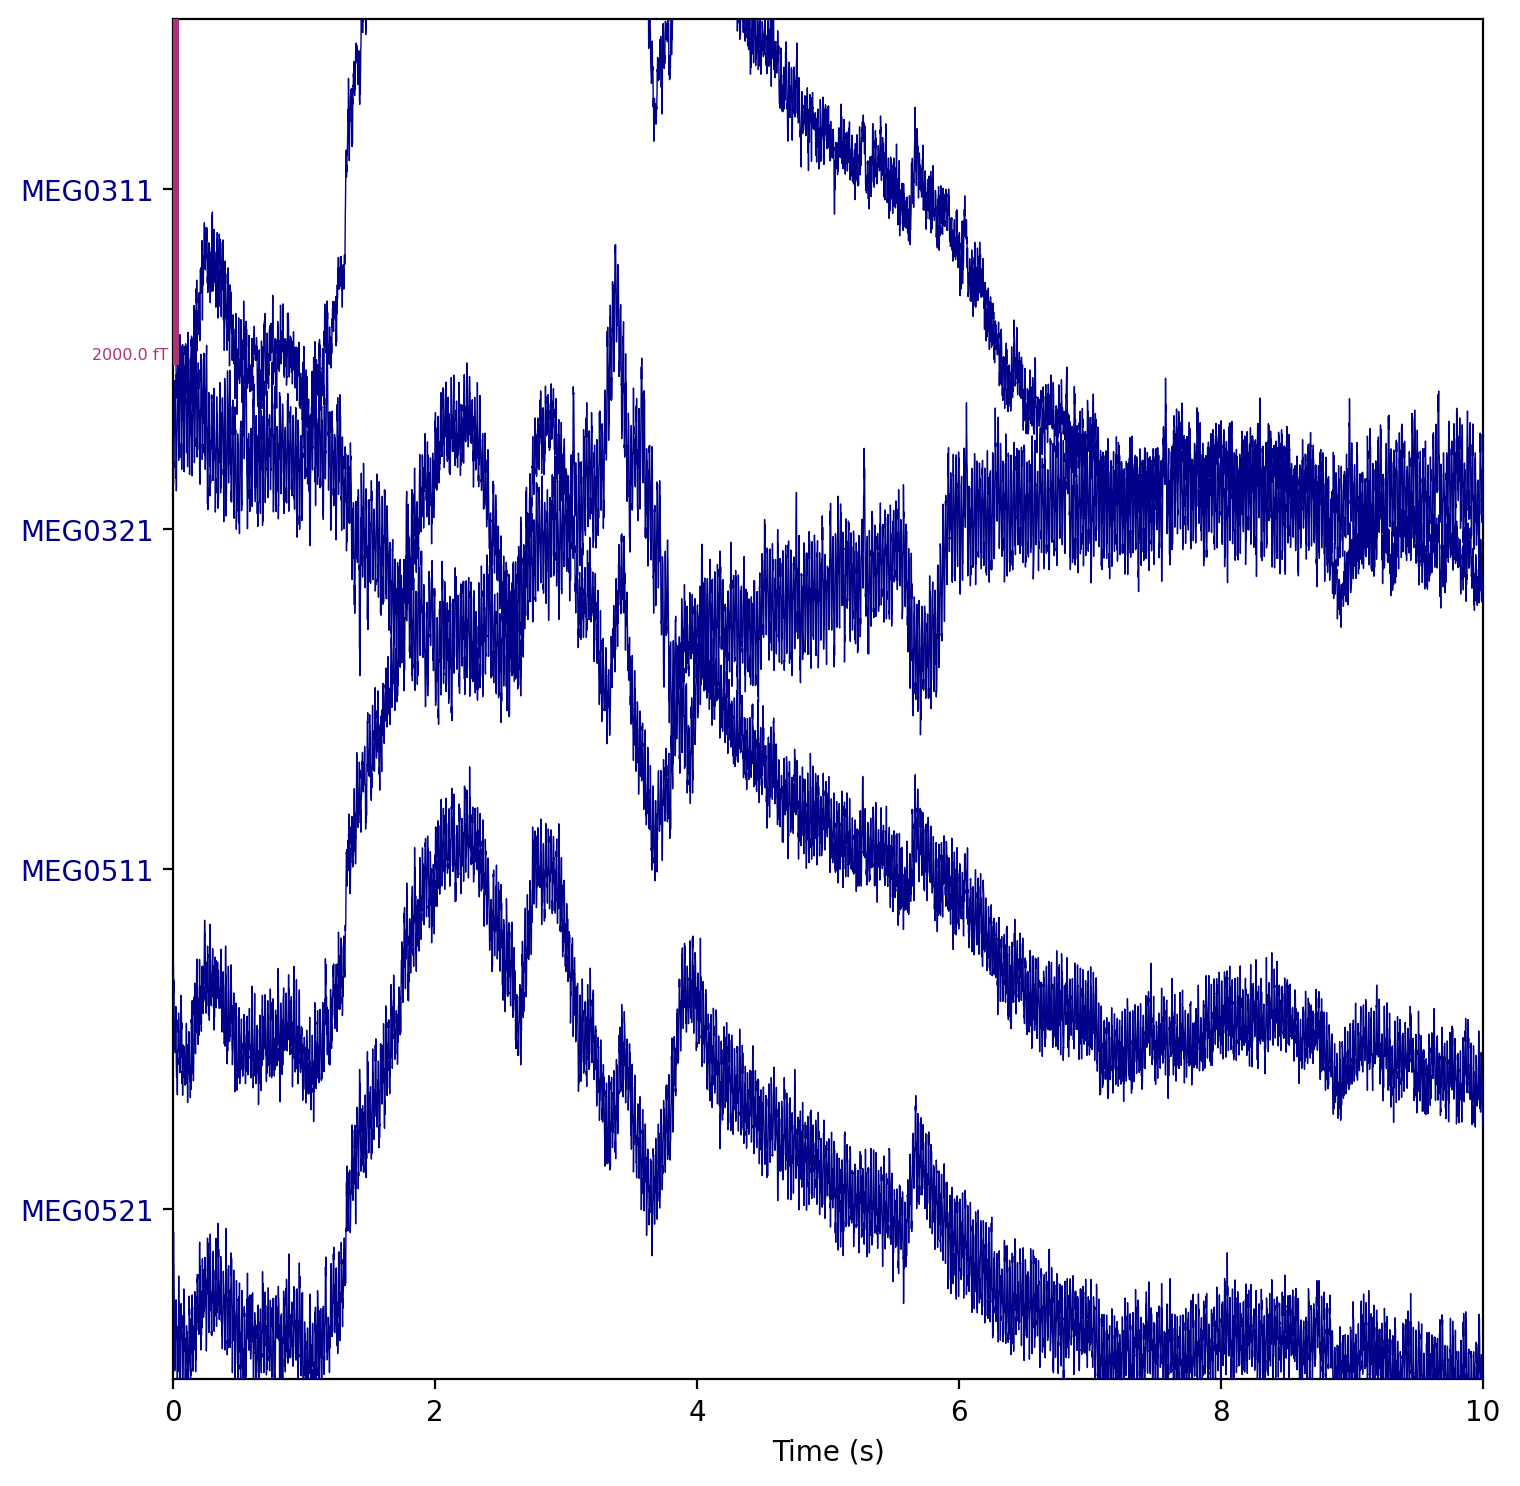

In [161]:
# Heartbeat artifacts visualization
regexp_heart=r"(MEG0[35][12]1)"
artifact_picks_heart=mne.pick_channels_regexp(raw.ch_names,regexp=regexp_heart)
raw.plot(order=artifact_picks_heart, n_channels=len(artifact_picks_heart),show_scrollbars=False)


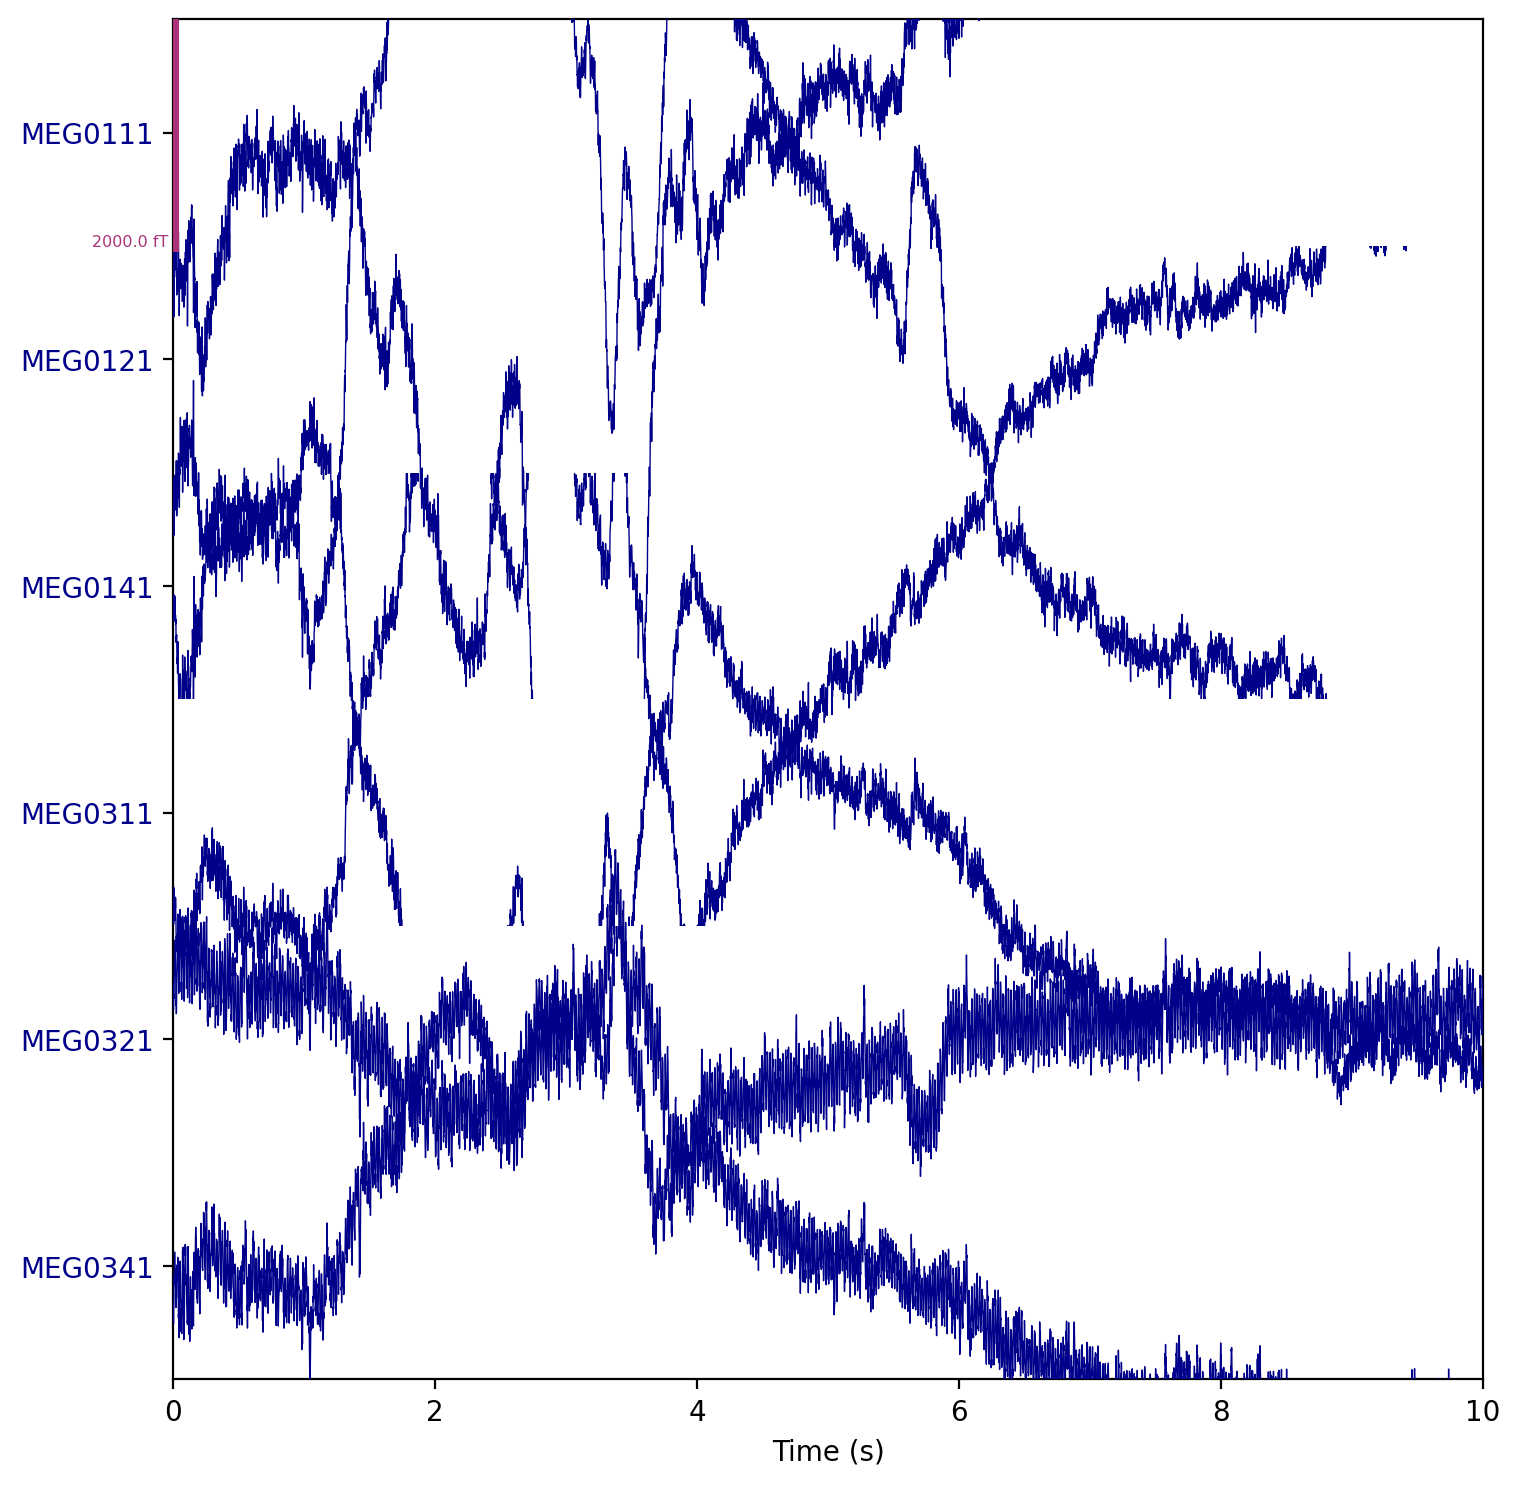

In [162]:
# Ocular artifacts visualization
regexp=r"(MEG0[13][124][1234])"
artifact_picks=mne.pick_channels_regexp(raw.ch_names,regexp=regexp)
raw.plot(order=artifact_picks, n_channels=len(artifact_picks),show_scrollbars=False)


Using EOG channels: EOG001, EOG002
EOG channel index for this subject is: [0 1]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 13 significant peaks
Number of EOG events detected: 13
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 8)
Using data from preloaded Raw for 13 events and 1001 original tim

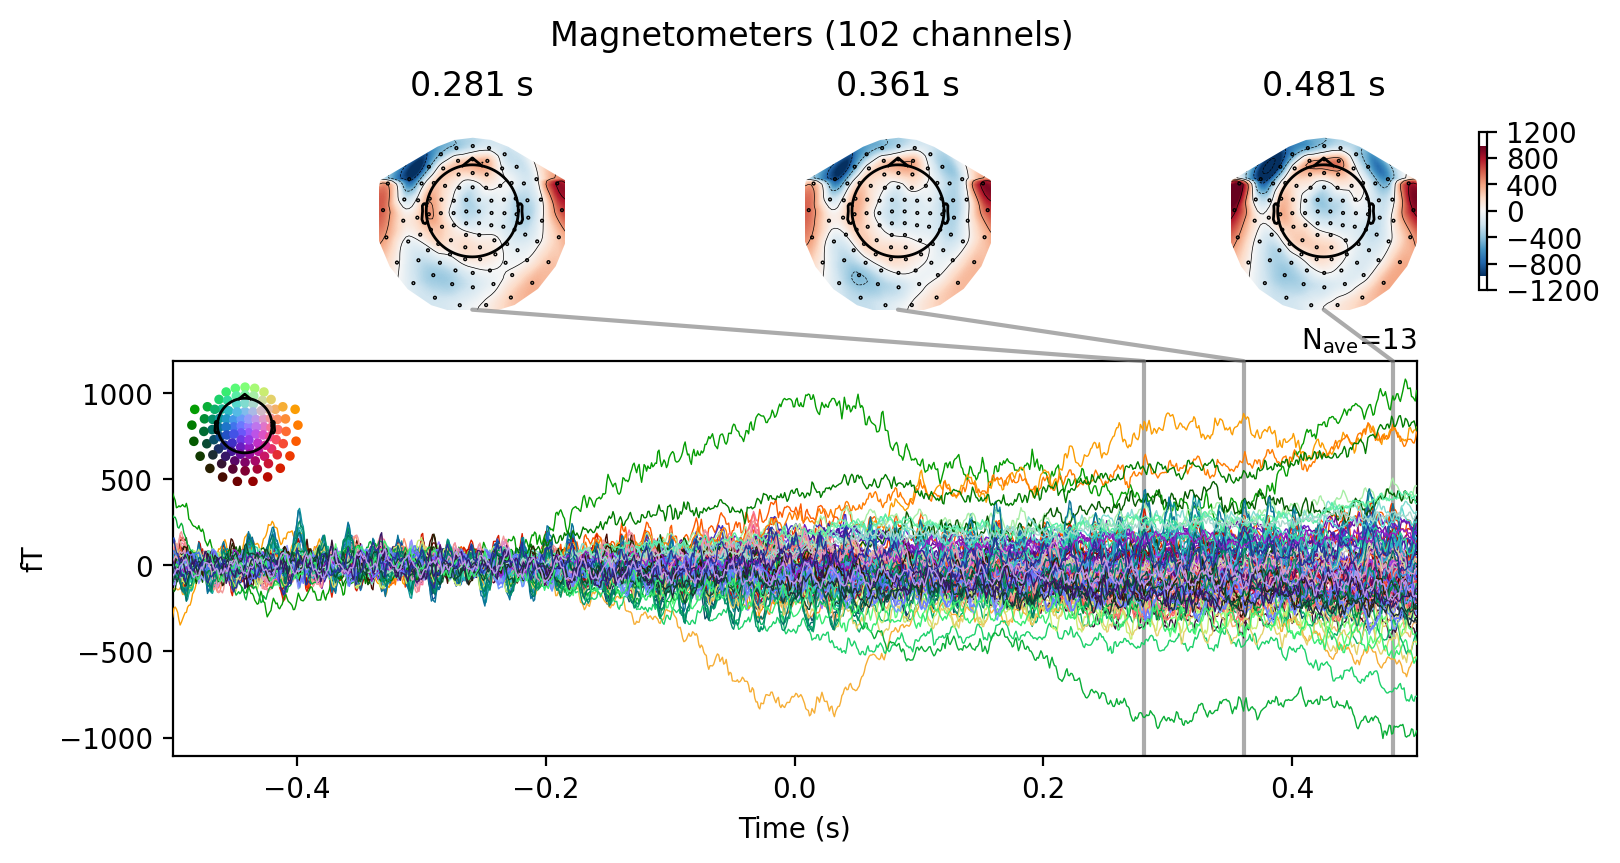

In [166]:
# Get a summary of the ocular artifact
eog_evoked=create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None,-0.2))
eog_evoked.plot_joint()

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 10000 samples (10.000 s)

Number of ECG events detected : 90 (average pulse 89 / min.)
Not setting metadata
90 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 8)
Using data from preloaded Raw for 90 events and 1001 original time points ...
2 bad epochs dropped
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 8)
13 projection items activated
SSP projectors applied...


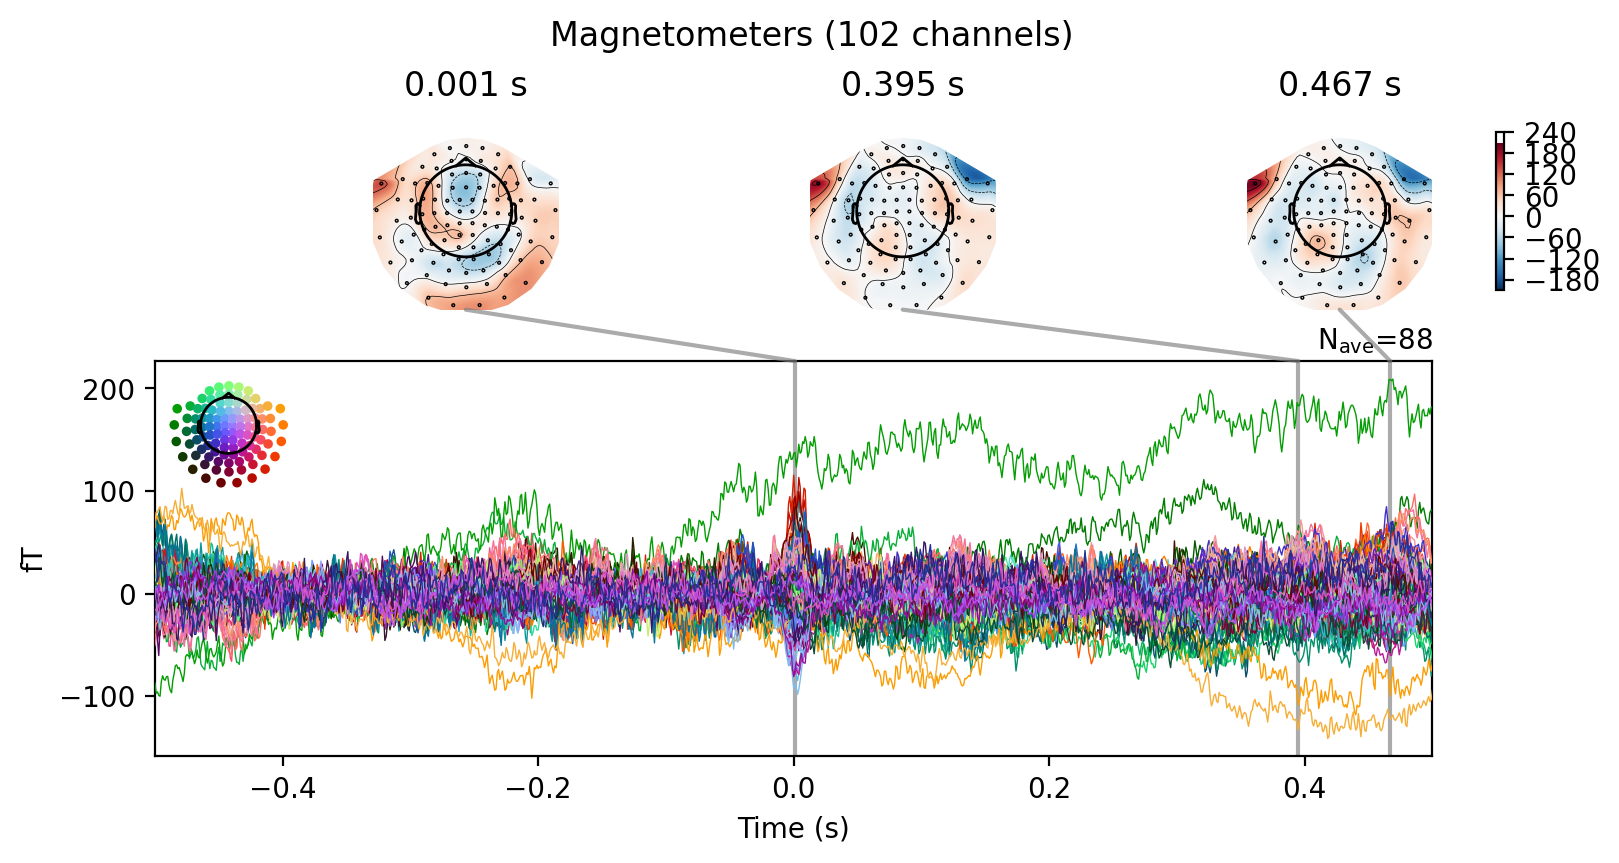

In [168]:
# Get a summary of heartbeat artifacts
ecg_evoked=create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(None,-0.2))
ecg_evoked.plot_joint()

In [170]:
filt_raw=raw.copy().filter(l_freq=1.0,h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s


In [172]:
# Fit the ICA
ica=ICA(n_components=30, max_iter="auto", random_state=97)
ica.fit(filt_raw)
ica

Fitting ICA to data using 102 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 2.6s.


<ICA | raw data decomposition, method: fastica (fit in 113 iterations on 60001 samples), 30 ICA components (102 PCA components available), channel types: mag, no sources marked for exclusion>

In [173]:
# Looking at the ICA solutions
explained_var_ratio=ica.get_explained_variance_ratio(filt_raw)
for channel_type, ratio in explained_var_ratio.items():
    print(f"Fraction of {channel_type} variance explained by all components: {ratio}")

Fraction of mag variance explained by all components: 0.9985895779966026


In [181]:
explained_var_ratio = ica.get_explained_variance_ratio(
    filt_raw, components=[0], ch_type="mag"
)
# This time, print as percentage.
ratio_percent = round(100 * explained_var_ratio["mag"])
print(
    f"Fraction of variance in MAG signal explained by second component: "
    f"{ratio_percent}%"
)

Fraction of variance in MAG signal explained by second component: 39%


Creating RawArray with float64 data, n_channels=32, n_times=60001
    Range : 33000 ... 93000 =     33.000 ...    93.000 secs
Ready.


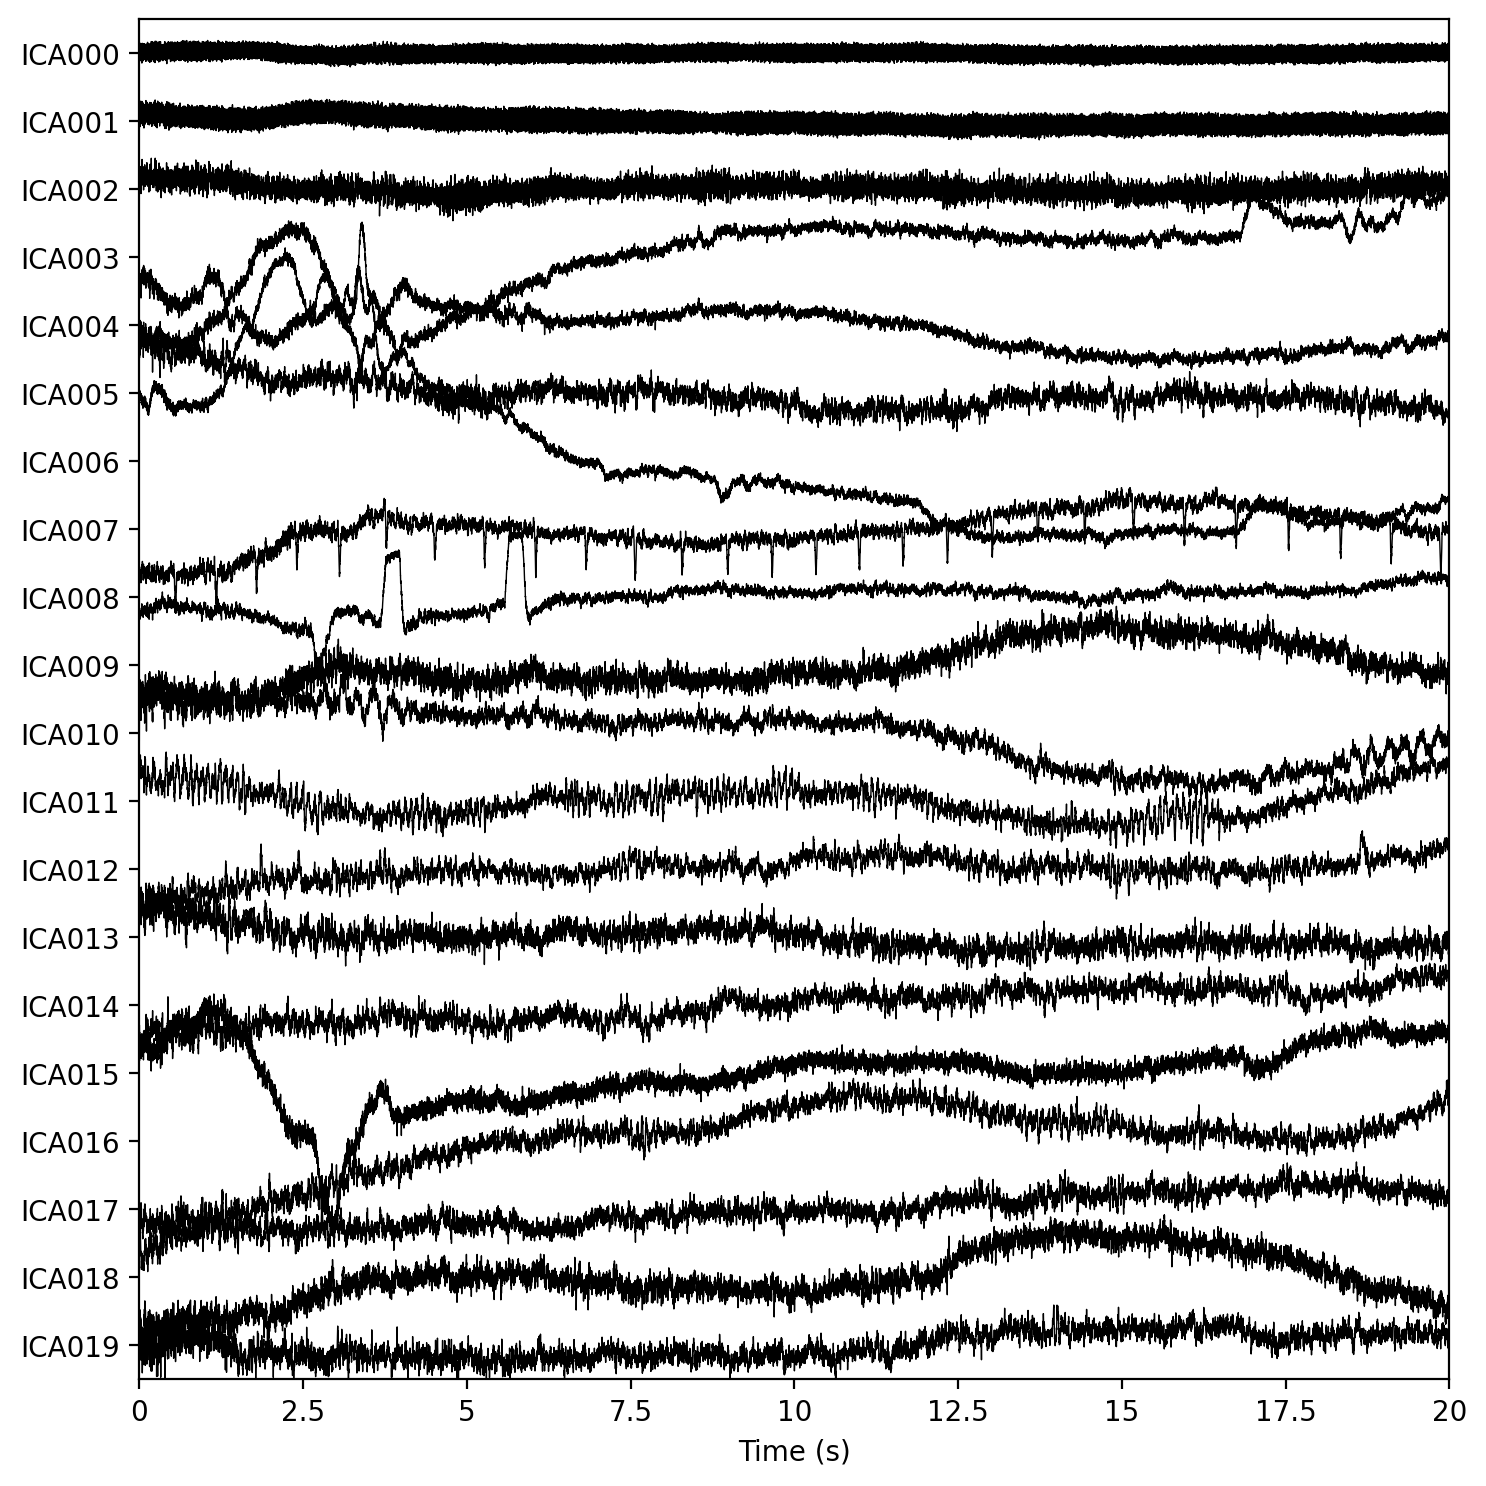

In [183]:
# Plot sources : different components of the ICA are plotted
raw.load_data()
ica.plot_sources(raw,show_scrollbars=False)

In [193]:
ica.plot_components()

[<MNEFigure size 1950x1832 with 20 Axes>,
 <MNEFigure size 1950x992 with 10 Axes>]

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 102 PCA components


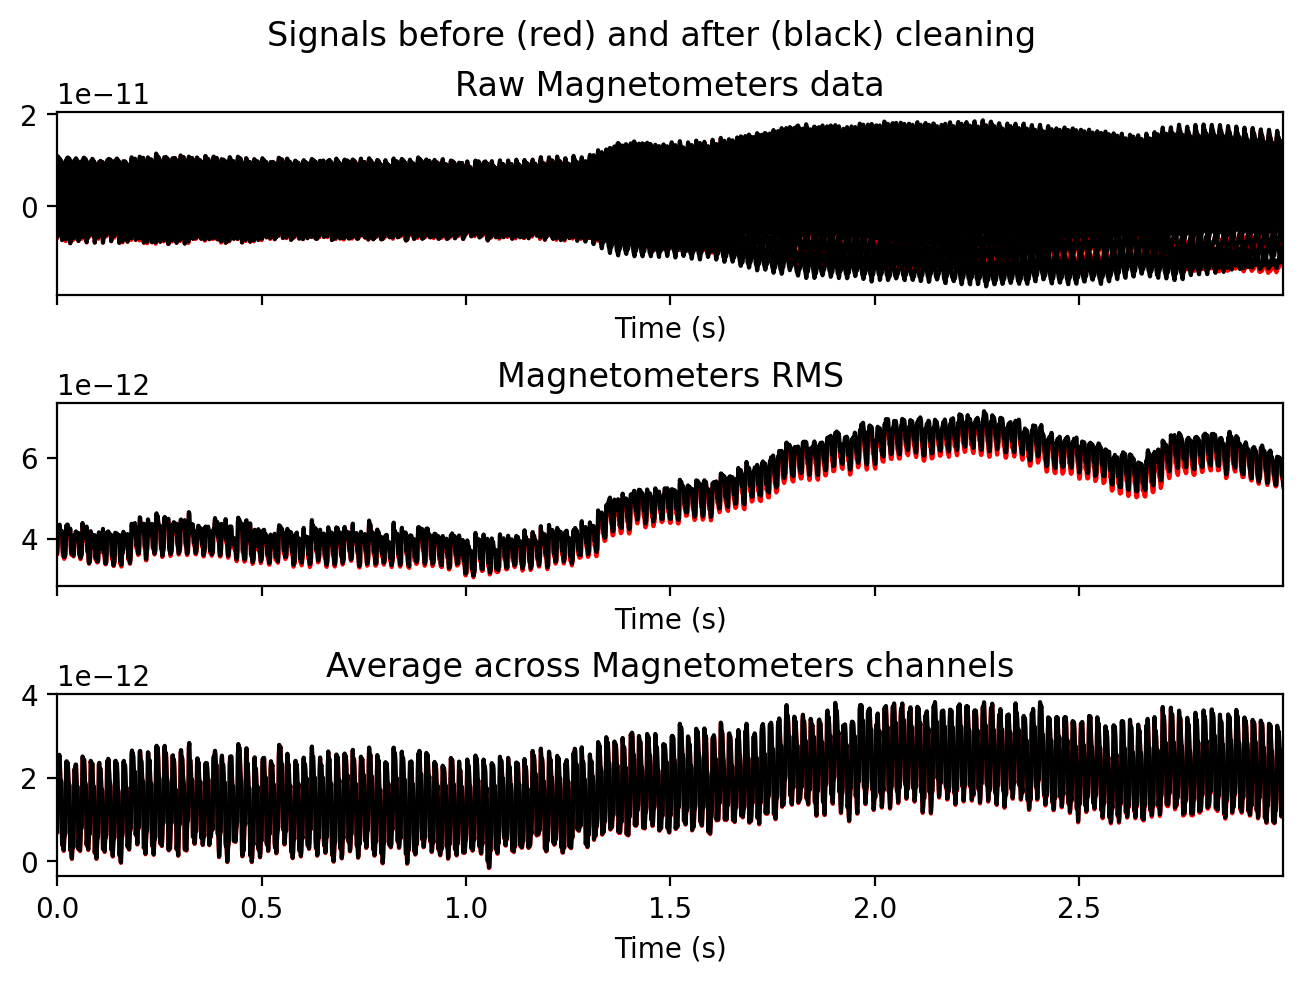

In [195]:
ica.plot_overlay(raw, exclude=[8], picks="mag")

In [197]:
ica.plot_properties(raw, picks=[7,8])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 1400x1200 with 6 Axes>, <Figure size 1400x1200 with 6 Axes>]

In [47]:
# Load Epo
epo_sequence=mne.read_epochs(epo_sequence_path)
raw=mne.io.read_raw_fif(path_raw_run,allow_maxshield=True, preload=True)


Reading /Volumes/T5_EVO/1-experiments/REPLAYSEQ/2-Data/derivatives/sequence/sub-16/meg/sub-16_task-reproduction_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...   12300.00 ms
        0 CTF compensation matrices available
Adding metadata with 58 columns
270 matching events found
No baseline correction applied
0 projection items activated
Opening raw data file /Volumes/T5_EVO/1-experiments/REPLAYSEQ/2-Data/raw/Data_neurospin/sub-16/run01_raw.fif...
    Read a total of 13 projection items:
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  i

/var/folders/qn/h72tf80n225331v43m72lykw0000gn/T/ipykernel_2666/1923425886.py:3: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw=mne.io.read_raw_fif(path_raw_run,allow_maxshield=True, preload=True)


Using EOG channels: EOG001, EOG002
EOG channel index for this subject is: [0 1]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 76 significant peaks
Number of EOG events detected: 76
Not setting metadata
76 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 13)
Using data from preloaded Raw for 76 events and 1001 original ti

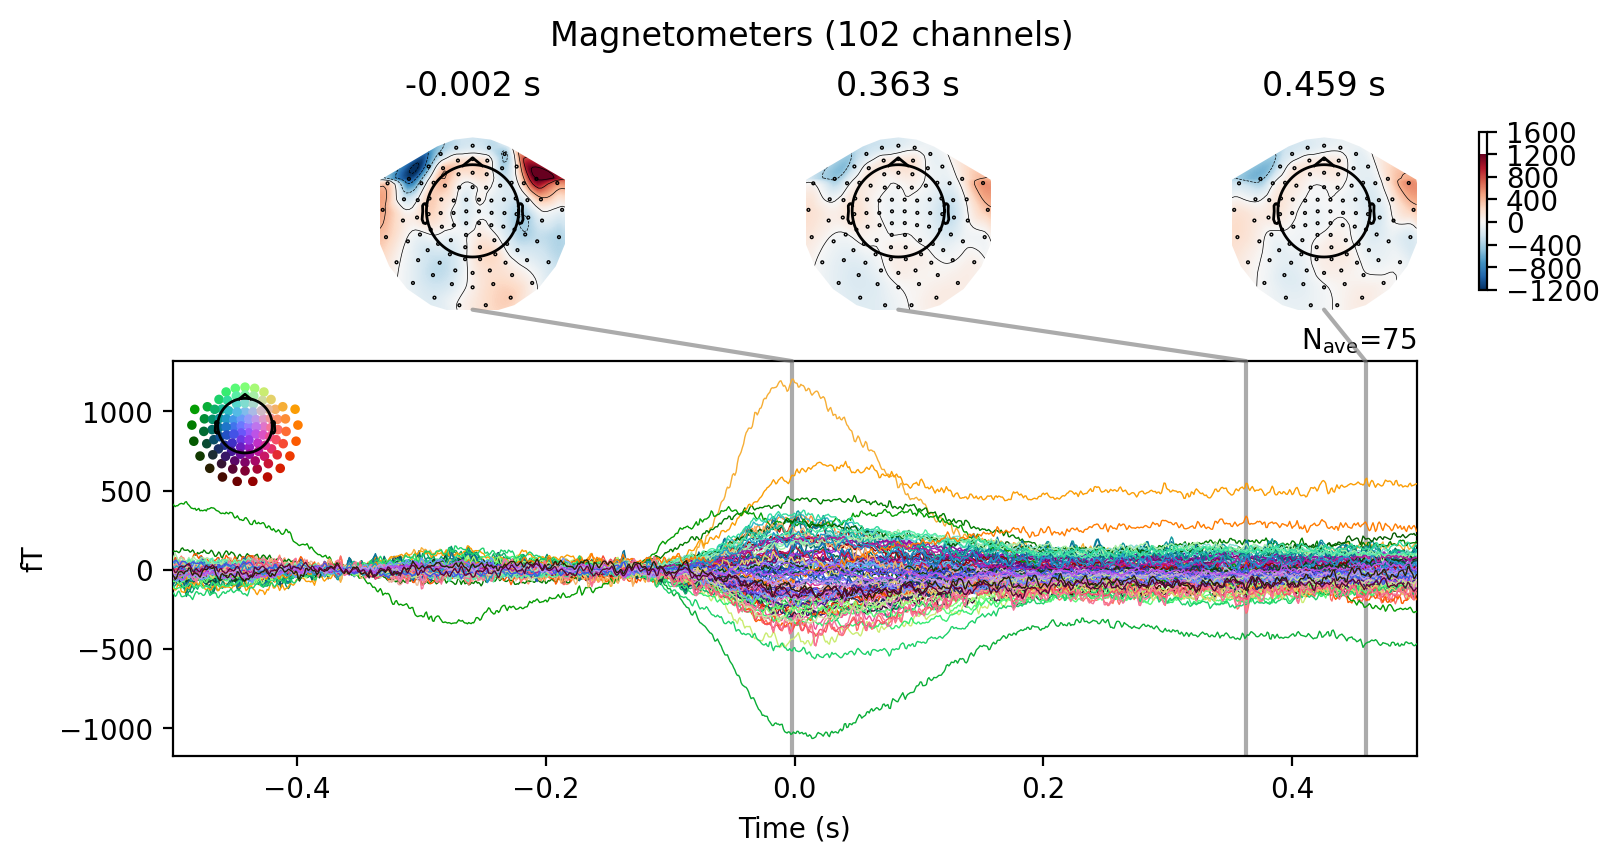

In [35]:
# Repairing with ICA

# -- Identify noisy channels 
noisy_ch=['MEG0112','MEG0113','MEG0122']

epo_sequence.plot(picks=noisy_ch)

# -- Create EOG epochs
# Specify the channel types to avoid EEG
eog_evoked = mne.preprocessing.create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))

# Only include magnetometers or gradiometers (adjust 'picks' based on your data)
eog_evoked.plot_joint(picks="mag")  # Replace "mag" with "grad" if necessary


In [21]:
inspect_raw(run_nb)

/Users/elyestabbane/Documents/UNICOG/8-MEG/sanity_checkMEG/scripts/modules/functions_sanity_check.py:451: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw=mne.io.read_raw_fif(path_raw, allow_maxshield=True, preload=True,verbose=verbose)


Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


/Users/elyestabbane/Documents/UNICOG/8-MEG/sanity_checkMEG/scripts/modules/functions_sanity_check.py:459: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.compute_psd().plot()
/Users/elyestabbane/Documents/UNICOG/8-MEG/sanity_checkMEG/scripts/modules/functions_sanity_check.py:459: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()


In [17]:
plot_evoked(epo_sequence,(None, 0))

Reading /Volumes/T5_EVO/1-experiments/REPLAYSEQ/2-Data/derivatives/sequence/sub-14/meg/sub-14_task-reproduction_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...   12300.00 ms
        0 CTF compensation matrices available
Adding metadata with 58 columns
270 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
